# Welcome to Lending Club Loan Dataset
I will do some explorations through the Loan Club Data. 

NOTE: English is not my native language, so sorry about if you see any error

<b>About the dataset</b> <br>
These files contain complete loan data for all loans issued through the 2007-2015, including the current loan status (Current, Late, Fully Paid, etc.) and latest payment information. The file containing loan data through the "present" contains complete loan data for all loans issued through the previous completed calendar quarter. Additional features include credit scores, number of finance inquiries, address including zip codes, and state, and collections among others. The file is a matrix of about 890 thousand observations and 75 variables. A data dictionary is provided in a separate file.

# Questions
Some questions that I will try to answer:
- Which type of data we are working?
- We have missing values? 
- How many unique entries we have?
- What's the distribution of Loan Status?
- What's the distribution of Amount of loans?
- What's the distribution of Interest Rate?
- What's the % of Defaults in loans?
- What's the most common grades?
- What's the most common employer titles?
- What's the most common Purpose that a client request a loan?
- What's the different between Terms?
- And a lot of other questions that will raise through the exploration;

Do you wanna see anothers interesting dataset analysis? <a href="https://www.kaggle.com/kabure/kernels">Click here</a> <br>

<h2> Importing the Librarys </h2> 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
from scipy import stats

#To plot figs on jupyter
%matplotlib inline
# figure size in inches
rcParams['figure.figsize'] = 14,6

<h2> Importing our dataset</h2> 

In [2]:
df_loan = pd.read_csv("../loan.csv",low_memory=False)

## Functions 
- To see all functions click in "code" button > 

In [3]:
def resumetable(df):
    print(f"Dataset Shape: {df.shape}")
    summary = pd.DataFrame(df.dtypes,columns=['dtypes'])
    summary = summary.reset_index()
    summary['Name'] = summary['index']
    summary = summary[['Name','dtypes']]
    summary['Missing'] = df.isnull().sum().values    
    summary['Uniques'] = df.nunique().values
    summary['First Value'] = df.loc[0].values
    summary['Second Value'] = df.loc[1].values
    summary['Third Value'] = df.loc[2].values

    for name in summary['Name'].value_counts().index:
        summary.loc[summary['Name'] == name, 'Entropy'] = round(stats.entropy(df[name].value_counts(normalize=True), base=2),2) 

    return summary

## We will start looking all variables and some informations about them
- I will divide 60 by 60 columns to a clear view of columns

### Resuming table. 1st to 60th

In [4]:
resumetable(df_loan[:100000])[:60]

Dataset Shape: (100000, 145)


,Name,dtypes,Missing,Uniques,First Value,Second Value,Third Value,Entropy
0,id,float64,100000,0,NaN,NaN,NaN,0.00
1,member_id,float64,100000,0,NaN,NaN,NaN,0.00
2,loan_amnt,int64,0,1463,2500,30000,5000,6.00
3,funded_amnt,int64,0,1463,2500,30000,5000,6.00
4,funded_amnt_inv,float64,0,1483,2500,30000,5000,6.18
5,term,object,0,2,36 months,60 months,36 months,0.90
6,int_rate,float64,0,46,13.56,18.94,17.97,4.96
7,installment,float64,0,10586,84.92,777.23,180.69,11.17
8,grade,object,0,7,C,D,D,2.15
9,sub_grade,object,0,35,C1,D2,D1,4.45


### Resuming table. 61th to 120th

In [5]:
resumetable(df_loan[:100000])[60:112]

Dataset Shape: (100000, 145)


,Name,dtypes,Missing,Uniques,First Value,Second Value,Third Value,Entropy
60,open_act_il,float64,0,42,2,4,1,3.00
61,open_il_12m,float64,0,7,1,2,0,1.64
62,open_il_24m,float64,0,17,2,3,2,2.41
63,mths_since_rcnt_il,float64,3448,263,2,3,14,5.65
64,total_bal_il,float64,0,55389,12560,87153,7150,14.23
65,il_util,float64,15652,194,69,88,72,6.54
66,open_rv_12m,float64,0,22,2,4,0,2.17
67,open_rv_24m,float64,0,32,7,5,2,2.99
68,max_bal_bc,float64,0,19527,2137,998,0,13.52
69,all_util,float64,30,148,28,57,35,6.40


### Resuming table. 120th to 148th

In [6]:
resumetable(df_loan[:100000])[112:]

Dataset Shape: (100000, 145)


,Name,dtypes,Missing,Uniques,First Value,Second Value,Third Value,Entropy
112,sec_app_earliest_cr_line,object,87079,557,NaN,NaN,NaN,8.38
113,sec_app_inq_last_6mths,float64,87079,7,NaN,NaN,NaN,1.51
114,sec_app_mort_acc,float64,87079,15,NaN,NaN,NaN,2.47
115,sec_app_open_acc,float64,87079,52,NaN,NaN,NaN,4.62
116,sec_app_revol_util,float64,87282,1054,NaN,NaN,NaN,9.83
117,sec_app_open_act_il,float64,87079,32,NaN,NaN,NaN,3.16
118,sec_app_num_rev_accts,float64,87079,66,NaN,NaN,NaN,4.85
119,sec_app_chargeoff_within_12_mths,float64,87079,12,NaN,NaN,NaN,0.19
120,sec_app_collections_12_mths_ex_med,float64,87079,11,NaN,NaN,NaN,0.32
121,sec_app_mths_since_last_major_derog,float64,95994,113,NaN,NaN,NaN,6.39


## Our Target would be the Purpose values.
- Let's understand which type of category values we have
- We need To select loans that are fully paid and that are not fully paid, removing current loans

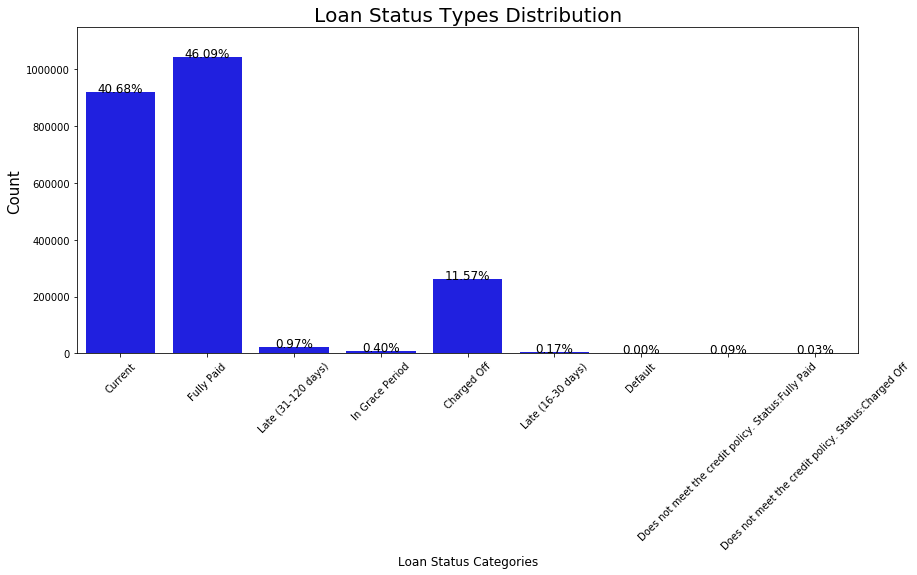

In [7]:
total = len(df_loan)

plt.figure(figsize = (14,6))

g = sns.countplot(x="loan_status", data=df_loan, 
                  color='blue')
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_xlabel("Loan Status Categories", fontsize=12)
g.set_ylabel("Count", fontsize=15)
g.set_title("Loan Status Types Distribution", fontsize=20)
sizes=[]
for p in g.patches:
    height = p.get_height()
    sizes.append(height)
    g.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total*100),
            ha="center", fontsize=12) 
g.set_ylim(0, max(sizes) * 1.10)

plt.show()

Cool! The values of interest are Fully Paid, Charged Off and Default values;


In [8]:
df_loan = df_loan.loc[df_loan['loan_status'].isin(['Fully Paid', 'Charged Off', 'Default'])]

# Purpose 
- Purpose - A category provided by the borrower for the loan request.
- As it a categorical feature that says what's the purpose to the loan, would be interesting to start by Purpose. 

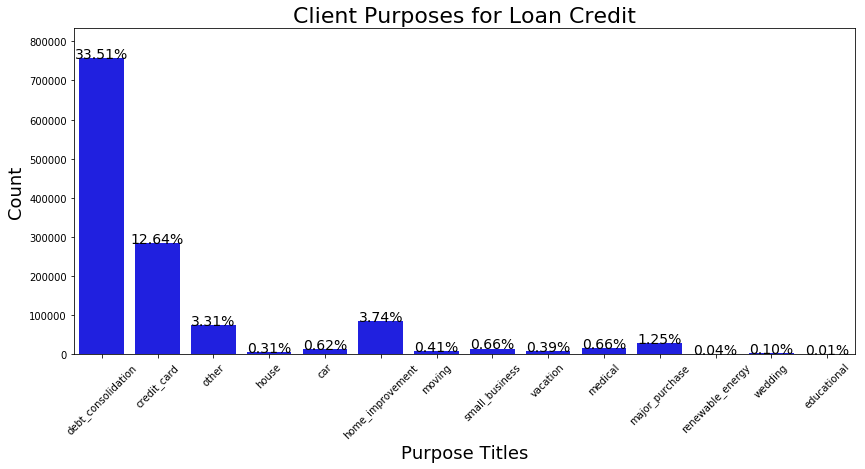

In [9]:

plt.figure(figsize=(14,6))

g = sns.countplot(x='purpose', data=df_loan, 
                  color='blue')
g.set_title("Client Purposes for Loan Credit", fontsize=22)
g.set_xlabel("Purpose Titles", fontsize=18)
g.set_ylabel('Count', fontsize=18)

sizes=[]

for p in g.patches:
    height = p.get_height()
    sizes.append(height)
    g.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total*100),
            ha="center", fontsize=14) 
    
g.set_ylim(0, max(sizes) * 1.10)
g.set_xticklabels(g.get_xticklabels(),
                  rotation=45)

plt.show()

Cool! The top 3 purposes are:
- 56.5% of the Loans are to Debt Consolidation 
- 22.87% are to pay Credit Card 
- 6.67% to Home Improvement 
- and many others purposes that sums 13.94%

# LOAN AMOUNT and INTEREST RATE Distributions
<b>Loan Amount</b> - <i>The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.</i><br>
<b>intRate </b>- <i>Interest Rate on the loan</i>


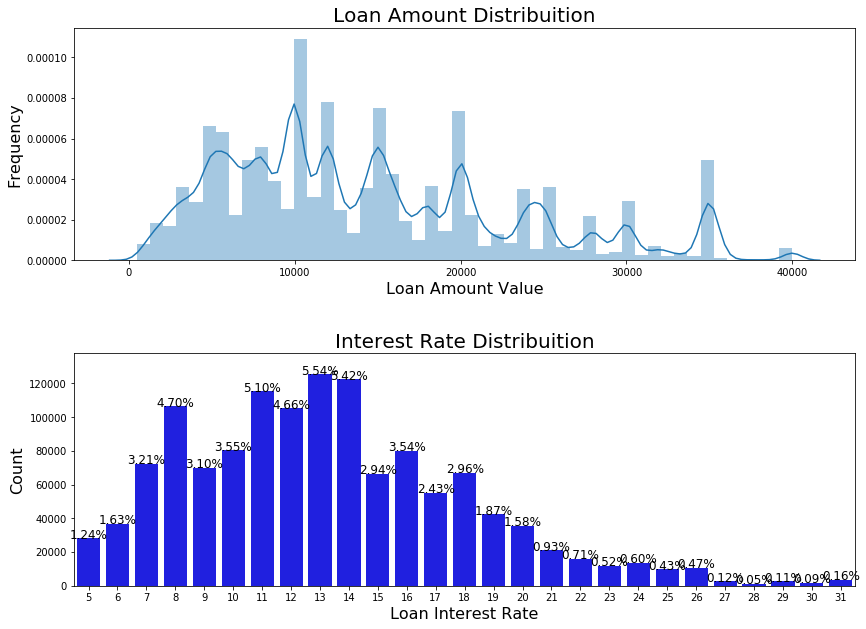

In [10]:
df_loan['int_round'] = df_loan['int_rate'].round(0).astype(int)

#I will start looking the loan_amnt column
plt.figure(figsize=(14,10))

# Loan Amt plot
plt.subplot(211)
g = sns.distplot(df_loan["loan_amnt"])
g.set_xlabel("Loan Amount Value", fontsize=16)
g.set_ylabel("Frequency", fontsize=16)
g.set_title("Loan Amount Distribuition", fontsize=20)

## Interest plot
plt.subplot(212)
g1 = sns.countplot(x="int_round", data=df_loan, 
                  color='blue')
g1.set_xlabel("Loan Interest Rate", fontsize=16)
g1.set_ylabel("Count", fontsize=16)
g1.set_title("Interest Rate Distribuition", fontsize=20)
sizes=[] # Get highest values in y
for p in g1.patches:
    height = p.get_height()
    sizes.append(height)
    g1.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total*100),
            ha="center", fontsize=12) 
g1.set_ylim(0, max(sizes) * 1.10) # set y limit based on highest heights

plt.subplots_adjust(hspace = 0.4,top = 0.9)

plt.show()

Nice ! <br>
We can note that a big part of the loans are values until USD 10,000 ( we will explore the quantiles and outliers too) <br>
Also, many part of all loans have interest between 7% and 14%;  <br>
In <b>Interest Rate:</b> The most common is 14%, followed by 13% and 11%.

# Loan Status
Understanding the default


In [11]:
df_loan.loc[df_loan.loan_status == \
            'Does not meet the credit policy. Status:Fully Paid', 'loan_status'] = 'NMCP Fully Paid'
df_loan.loc[df_loan.loan_status == \
            'Does not meet the credit policy. Status:Charged Off', 'loan_status'] = 'NMCP Charged Off'

<h2>Loan Status Distribuition</h2>

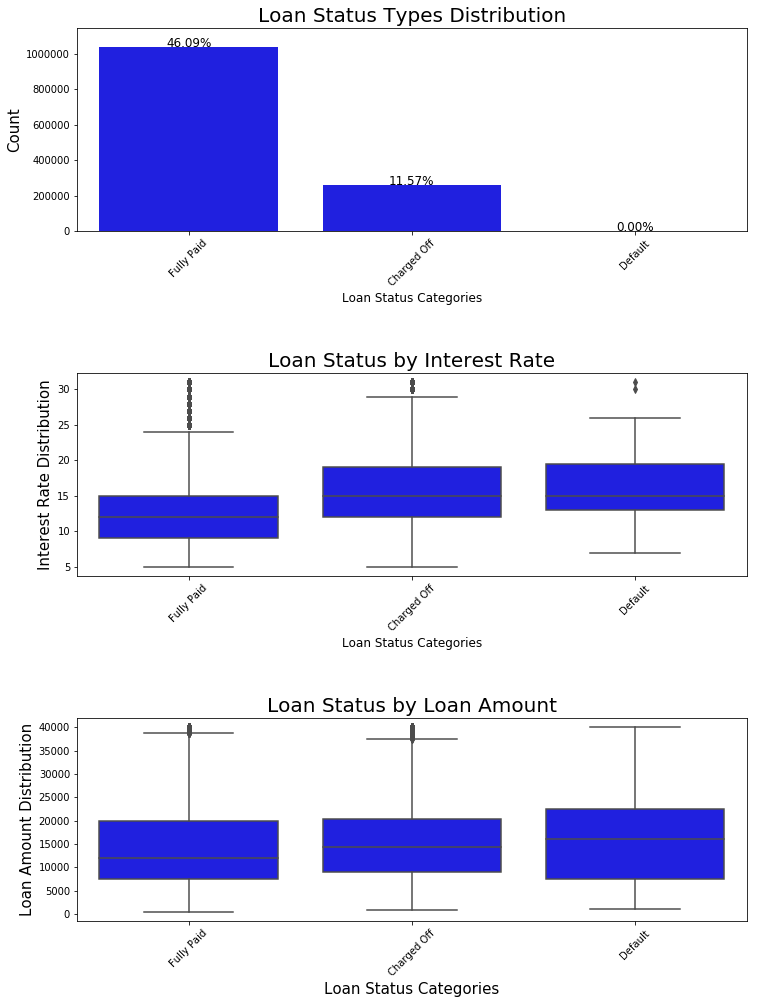

In [12]:
plt.figure(figsize = (12,16))

plt.subplot(311)
g = sns.countplot(x="loan_status", data=df_loan, 
                  color='blue')
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_xlabel("Loan Status Categories", fontsize=12)
g.set_ylabel("Count", fontsize=15)
g.set_title("Loan Status Types Distribution", fontsize=20)
sizes=[]
for p in g.patches:
    height = p.get_height()
    sizes.append(height)
    g.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total*100),
            ha="center", fontsize=12) 
g.set_ylim(0, max(sizes) * 1.10)

plt.subplot(312)
g1 = sns.boxplot(x="loan_status", y="int_round", data=df_loan, 
                 color='blue')
g1.set_xticklabels(g1.get_xticklabels(),rotation=45)
g1.set_xlabel("Loan Status Categories", fontsize=12)
g1.set_ylabel("Interest Rate Distribution", fontsize=15)
g1.set_title("Loan Status by Interest Rate", fontsize=20)

plt.subplot(313)
g2 = sns.boxplot(x="loan_status", y="loan_amnt", data=df_loan, 
                 color='blue')
g2.set_xticklabels(g2.get_xticklabels(),rotation=45)
g2.set_xlabel("Loan Status Categories", fontsize=15)
g2.set_ylabel("Loan Amount Distribution", fontsize=15)
g2.set_title("Loan Status by Loan Amount", fontsize=20)

plt.subplots_adjust(hspace = 0.7,top = 0.9)

plt.show()

Cool! 


We can see that People that Not meet the credit policy has a lowest values in amount distribution.

<h2>ISSUE_D</h2>

Going depth in the default exploration to see the amount and counting though the <b>ISSUE_D </b>,<br>
that is: <i><b> The month which the loan was funded</b></i>

In [13]:
df_loan['issue_month'], df_loan['issue_year'] = df_loan['issue_d'].str.split('-', 1).str

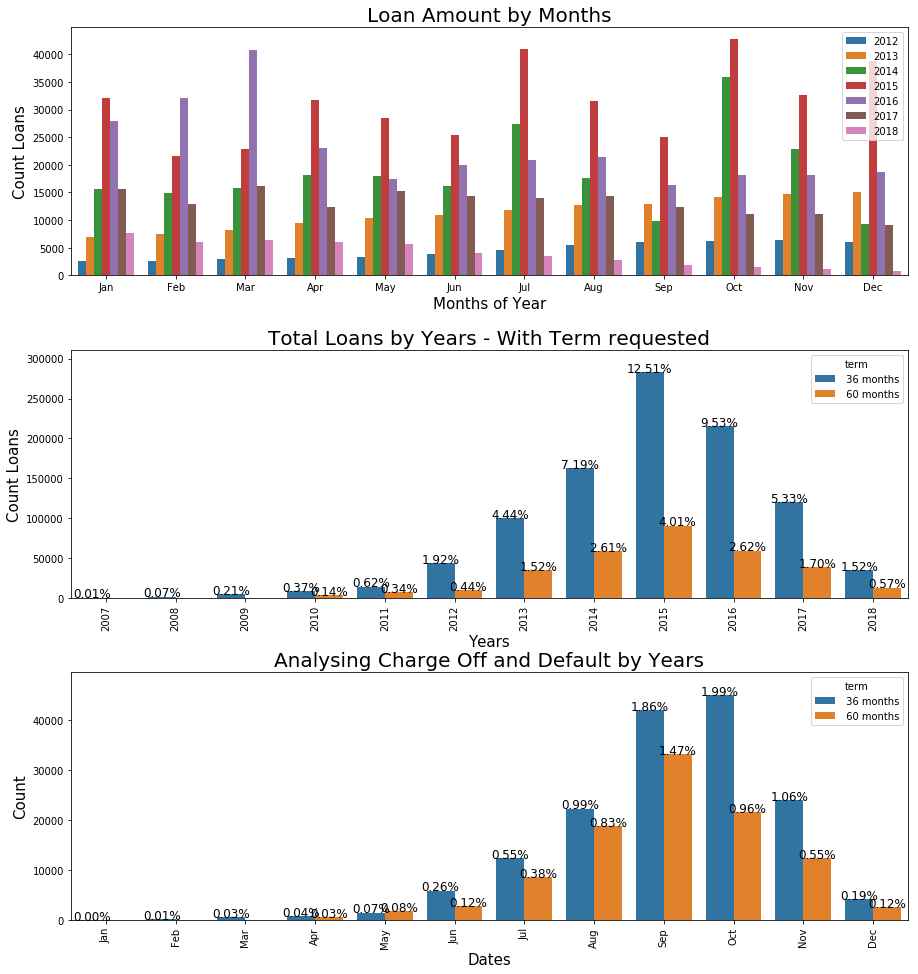

In [14]:
months_order = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", 
                "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
df_loan['issue_month'] = pd.Categorical(df_loan['issue_month'],
                                        categories=months_order, 
                                        ordered=True)
#Issue_d x loan_amount
plt.figure(figsize = (15,16))

plt.subplot(311)
g = sns.countplot(x='issue_month', hue='issue_year', 
                  data=df_loan[df_loan['issue_year'].astype(int) >= 2012])
#g.set_xticklabels(g.get_xticklabels(),rotation=90)
g.set_xlabel("Months of Year", fontsize=15)
g.set_ylabel("Count Loans", fontsize=15)
g.legend(loc='best')
g.set_title("Loan Amount by Months", fontsize=20)

plt.subplot(312)
#Looking the count of defaults though the issue_d that is The month which the loan was funded
g1 = sns.countplot(x='issue_year', hue='term', 
                   data=df_loan)
g1.set_xticklabels(g1.get_xticklabels(),rotation=90)
g1.set_xlabel("Years", fontsize=15)
g1.set_ylabel("Count Loans", fontsize=15)
g1.set_title("Total Loans by Years - With Term requested", fontsize=20)
sizes=[]
for p in g1.patches:
    height = p.get_height()
    sizes.append(height)
    g1.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total*100),
            ha="center", fontsize=12) 
g1.set_ylim(0, max(sizes) * 1.10)

plt.subplot(313)
#Looking the count of defaults though the issue_d that is The month which the loan was funded
g2 = sns.countplot(x='issue_year', data=df_loan.loc[(df_loan['loan_status'] == 'Charged Off') | 
                                                   (df_loan['loan_status'] == 'NMCP Charged Off') |
                                                   (df_loan['loan_status'] == 'Default')],
                  hue='term',)
g2.set_xticklabels(g.get_xticklabels(),rotation=90)
g2.set_xlabel("Dates", fontsize=15)
g2.set_ylabel("Count", fontsize=15)
g2.set_title("Analysing Charge Off and Default by Years", fontsize=20)
sizes=[]
for p in g2.patches:
    height = p.get_height()
    sizes.append(height)
    g2.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total*100),
            ha="center", fontsize=12) 
g2.set_ylim(0, max(sizes) * 1.10)

plt.subplots_adjust(hspace = 0.3,top = 0.9)

plt.show()

Cool! We can note that the peak(60k) of loans was in March 2016; <br>
The data is more consistent after 2012 ~ 2013... And it's seem to a linear growth by the years

# Crosstab - Purpose by Loan Status

In [15]:
#Exploring the loan_status x purpose
purp_loan= ['purpose', 'loan_status']
cm = sns.light_palette("green", as_cmap=True)
(round(pd.crosstab(df_loan[purp_loan[0]], df_loan[purp_loan[1]], 
                   normalize='columns') * 100,2)).style.background_gradient(cmap = cm)

loan_status,Charged Off,Default,Fully Paid
purpose,,,
car,0.79,3.23,1.16
credit_card,18.59,12.9,22.75
debt_consolidation,61.55,61.29,57.25
educational,0.02,0,0.03
home_improvement,5.77,6.45,6.66
house,0.58,0,0.52
major_purchase,2.03,0,2.21
medical,1.26,3.23,1.13
moving,0.82,3.23,0.67


# Crosstab - Loan Status by Grade

In [16]:
loan_grade = ['loan_status', 'grade']
cm = sns.light_palette("green", as_cmap=True)
pd.crosstab(df_loan[loan_grade[0]], df_loan[loan_grade[1]]).style.background_gradient(cmap = cm)


grade,A,B,C,D,E,F,G
loan_status,,,,,,,
Charged Off,13766,51077,83262,59441,35364,14263,4482
Default,2,6,9,8,4,2,0
Fully Paid,212477,329075,286666,135839,56206,17220,4469


# Interest Rate by Grade and Loan_status
Is the 

In [17]:
loan_grade = ['loan_status', 'grade']
cm = sns.light_palette("green", as_cmap=True)
round(pd.crosstab(df_loan[loan_grade[0]], df_loan[loan_grade[1]], 
            values=df_loan['int_rate'], aggfunc='mean'),2).fillna(0).style.background_gradient(cmap = cm)

grade,A,B,C,D,E,F,G
loan_status,,,,,,,
Charged Off,7.39,10.79,14.07,17.76,21.16,25.05,27.91
Default,7.03,10.8,14.15,18.73,25.53,30.22,0
Fully Paid,7.11,10.67,14.01,17.67,21.07,24.77,27.47


Wow! It's very meaningful. 
It's clear note the differences between the interest in Grades. 

# Verification Status
- Indicates if the co-borrowers' joint income was verified by LC, not verified, or if the income source was verified

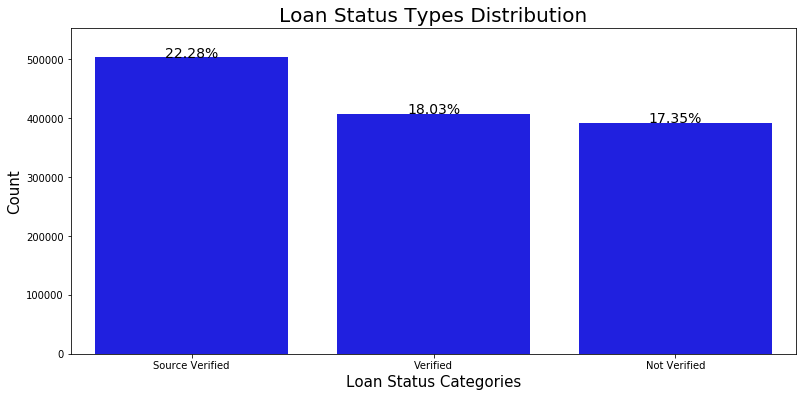

In [18]:
plt.figure(figsize = (13,6))

g = sns.countplot(x="verification_status", data=df_loan, 
                  color='blue')
g.set_xlabel("Loan Status Categories", fontsize=15)
g.set_ylabel("Count", fontsize=15)
g.set_title("Loan Status Types Distribution", fontsize=20)
sizes=[]
for p in g.patches:
    height = p.get_height()
    sizes.append(height)
    g.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total*100),
            ha="center", fontsize=14) 
g.set_ylim(0, max(sizes) * 1.10)

plt.show()

Cool! Only 32.95% of the loans are not verified; <br>
Let's see the distribution of Verification Status by Loan Status

## Verification Status by Loan Status

In [19]:
#Looking the 'verification_status' column that is the Indicates 
#if the co-borrowers' joint income was verified by LC, not verified, or if the income source was verified
loan_verification = ['loan_status', 'verification_status']
cm = sns.light_palette("green", as_cmap=True)
pd.crosstab(df_loan[loan_verification[0]], df_loan[loan_verification[1]], 
            normalize='index').style.background_gradient(cmap = cm)

verification_status,Not Verified,Source Verified,Verified
loan_status,,,
Charged Off,0.220512,0.406554,0.372934
Default,0.225806,0.354839,0.419355
Fully Paid,0.321039,0.381351,0.297611


Cool! We found a interesting pattern. <br>
Loan Status NMCP(Not Meet Credit Politic) have the most part of loans as "Not verified" with a highest mean in comparison with other categorys

<h2>INSTALLMENT Column </h2> <br>
<i>The monthly payment owed by the borrower if the loan originates.</i>

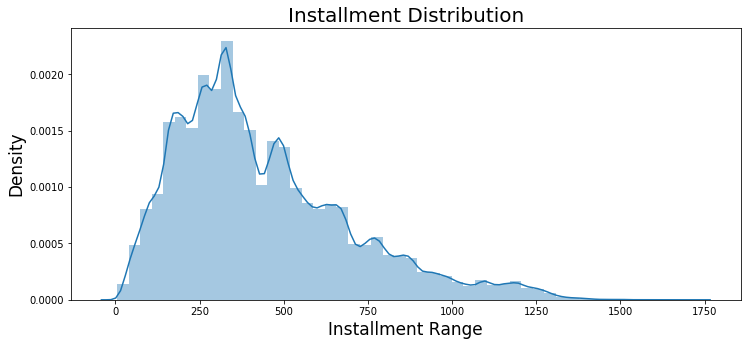

In [20]:
plt.figure(figsize=(12,5))

sns.distplot(df_loan['installment'])
plt.title("Installment Distribution", fontsize=20)
plt.xlabel("Installment Range", fontsize=17)
plt.ylabel("Density", fontsize=17)

plt.show()

Nice. We can see that the peak of our distribution is ~300 USD monthly.

With this information, we can investigate the difference between emp_title or regions, to find some interesting patterns of values

# Installment by Loan Status

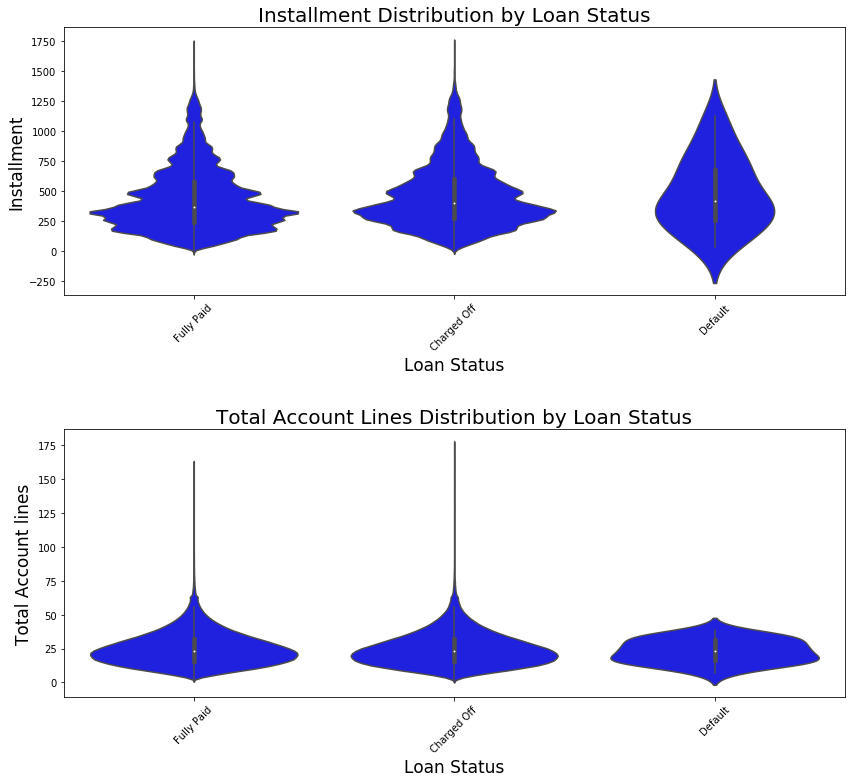

In [21]:
plt.figure(figsize = (14,12))

plt.subplot(211)
g = sns.violinplot(x='loan_status', y="installment",
                   data=df_loan, color='blue')
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_xlabel("Loan Status", fontsize=17)
g.set_ylabel("Installment", fontsize=17)
g.set_title("Installment Distribution by Loan Status", fontsize=20)

plt.subplot(212)
g1 = sns.violinplot(x='loan_status', y="total_acc",
                   data=df_loan, color='blue')
g1.set_xticklabels(g.get_xticklabels(),rotation=45)
g1.set_xlabel("Loan Status", fontsize=17)
g1.set_ylabel("Total Account lines", fontsize=17)
g1.set_title("Total Account Lines Distribution by Loan Status", fontsize=20)

plt.subplots_adjust(hspace = 0.5,top = 0.9)

plt.show()

# Crosstab - Loan Status by Application Type

In [22]:
#Exploring the loan_status x Application_type
loan_application = ['loan_status', 'application_type']
cm = sns.light_palette("green", as_cmap=True)
pd.crosstab(df_loan[loan_application[0]], df_loan[loan_application[1]]).style.background_gradient(cmap = cm)

application_type,Individual,Joint App
loan_status,,
Charged Off,255926,5729
Default,24,7
Fully Paid,1024444,17508


<h2>Distribuition of Application_tye thought the Loan Amount and Interest Rate</h2>

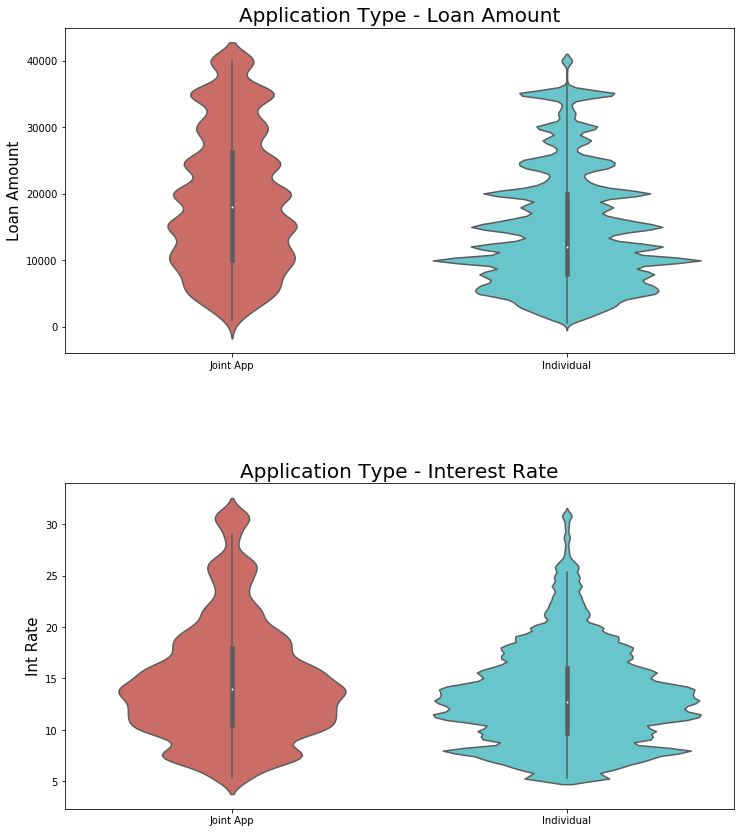

In [23]:
plt.figure(figsize = (12,14))
#The amount and int rate x application_type 
plt.subplot(211)
g = sns.violinplot(x="application_type", y="loan_amnt",data=df_loan, 
            palette="hls")
g.set_title("Application Type - Loan Amount", fontsize=20)
g.set_xlabel("", fontsize=15)
g.set_ylabel("Loan Amount", fontsize=15)

plt.subplot(212)
g1 = sns.violinplot(x="application_type", y="int_rate",data=df_loan,
               palette="hls")
g1.set_title("Application Type - Interest Rate", fontsize=20)
g1.set_xlabel("", fontsize=15)
g1.set_ylabel("Int Rate", fontsize=15)

plt.subplots_adjust(wspace = 0.4, hspace = 0.4,top = 0.9)

plt.show()

<h2>Looking the Home Ownership by Loan_Amount</h2>

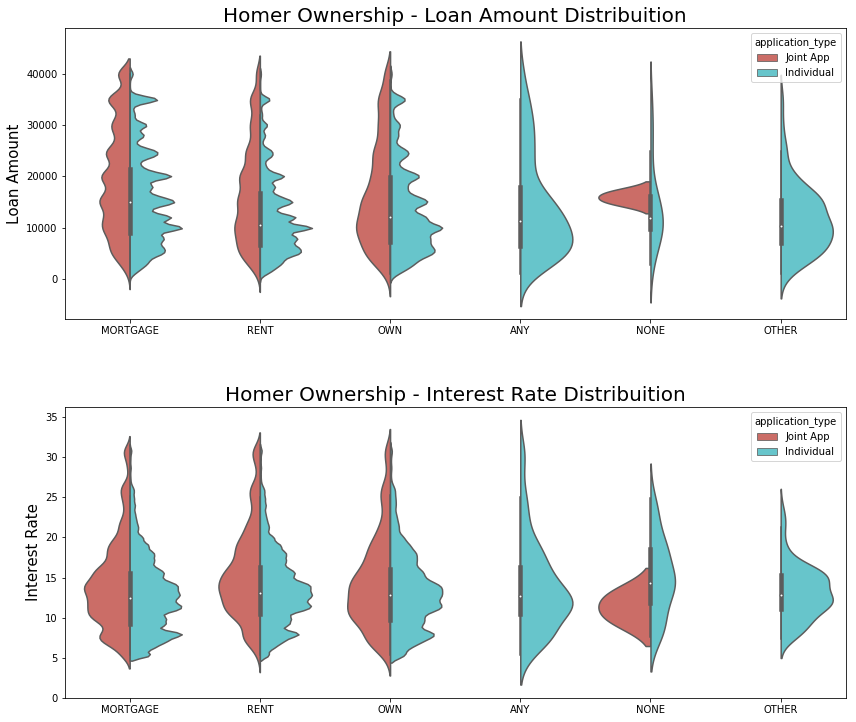

In [24]:
plt.figure(figsize = (14,12))

plt.subplot(211)
g = sns.violinplot(x="home_ownership",y="loan_amnt",data=df_loan,
               kind="violin",
               split=True,palette="hls",
               hue="application_type")
g.set_title("Homer Ownership - Loan Amount Distribuition", fontsize=20)
g.set_xlabel("", fontsize=15)
g.set_ylabel("Loan Amount", fontsize=15)

plt.subplot(212)
g1 = sns.violinplot(x="home_ownership",y="int_rate",data=df_loan,
               kind="violin",
               split=True,palette="hls",
               hue="application_type")
g1.set_title("Homer Ownership - Interest Rate Distribuition", fontsize=20)
g1.set_xlabel("", fontsize=15)
g1.set_ylabel("Interest Rate", fontsize=15)

plt.subplots_adjust(hspace = 0.3,top = 0.9)

plt.show()

## Crosstab - Home Ownership by Loan Status

In [25]:
loan_home = ['loan_status', 'home_ownership']
cm = sns.light_palette("green", as_cmap=True)
round(pd.crosstab(df_loan[loan_home[0]], df_loan[loan_home[1]], 
            normalize='index'),2).fillna(0).style.background_gradient(cmap = cm)

home_ownership,ANY,MORTGAGE,NONE,OTHER,OWN,RENT
loan_status,,,,,,
Charged Off,0,0.43,0,0,0.11,0.46
Default,0,0.42,0,0,0.16,0.42
Fully Paid,0,0.51,0,0,0.11,0.38


<h2> Looking the Purpose distribuition  </h2>

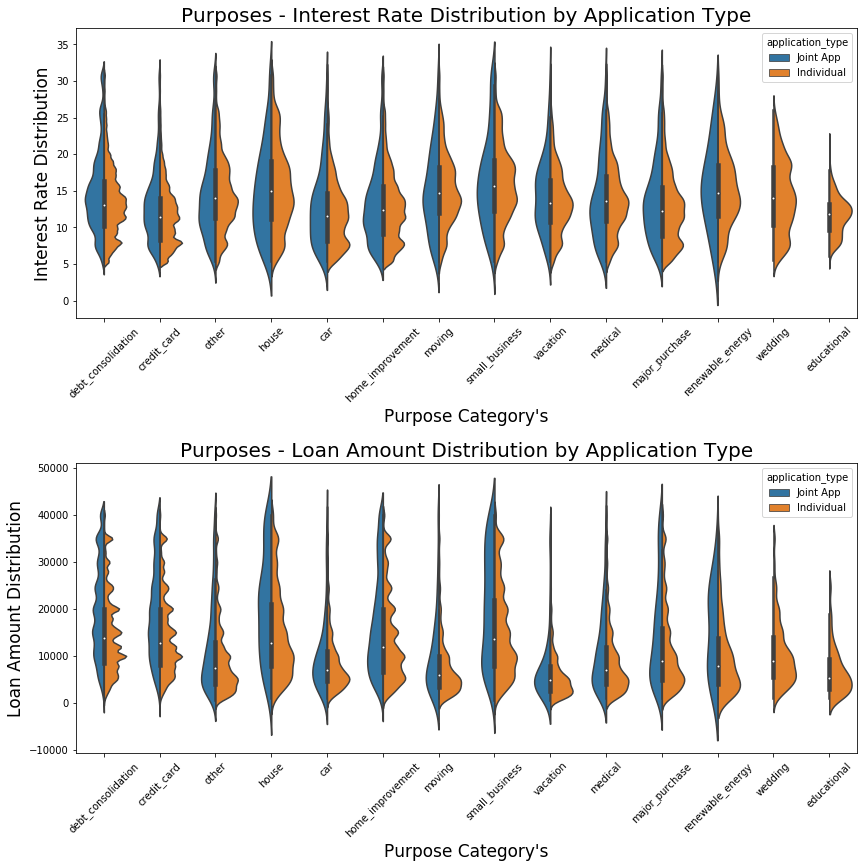

In [26]:
# Now will start exploring the Purpose variable
plt.figure(figsize = (14,13))

plt.subplot(211)
g = sns.violinplot(x="purpose",y="int_rate",data=df_loan,
                    hue="application_type", split=True)
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_title("Purposes - Interest Rate Distribution by Application Type", fontsize=20)
g.set_xlabel("Purpose Category's", fontsize=17)
g.set_ylabel("Interest Rate Distribution", fontsize=17)

plt.subplot(212)
g1 = sns.violinplot(x="purpose",y="loan_amnt",data=df_loan,
                    hue="application_type", split=True)
g1.set_xticklabels(g1.get_xticklabels(),rotation=45)
g1.set_title("Purposes - Loan Amount Distribution by Application Type", fontsize=20)
g1.set_xlabel("Purpose Category's", fontsize=17)
g1.set_ylabel("Loan Amount Distribution", fontsize=17)

plt.subplots_adjust(hspace = 0.5,top = 0.9)

plt.show()

<h2>Looking the Grades </h2>
I will explore some variables.<br>
the first variable I will explore is GRADE.<br>
description of grade: <b>LC assigned loan grade</b>

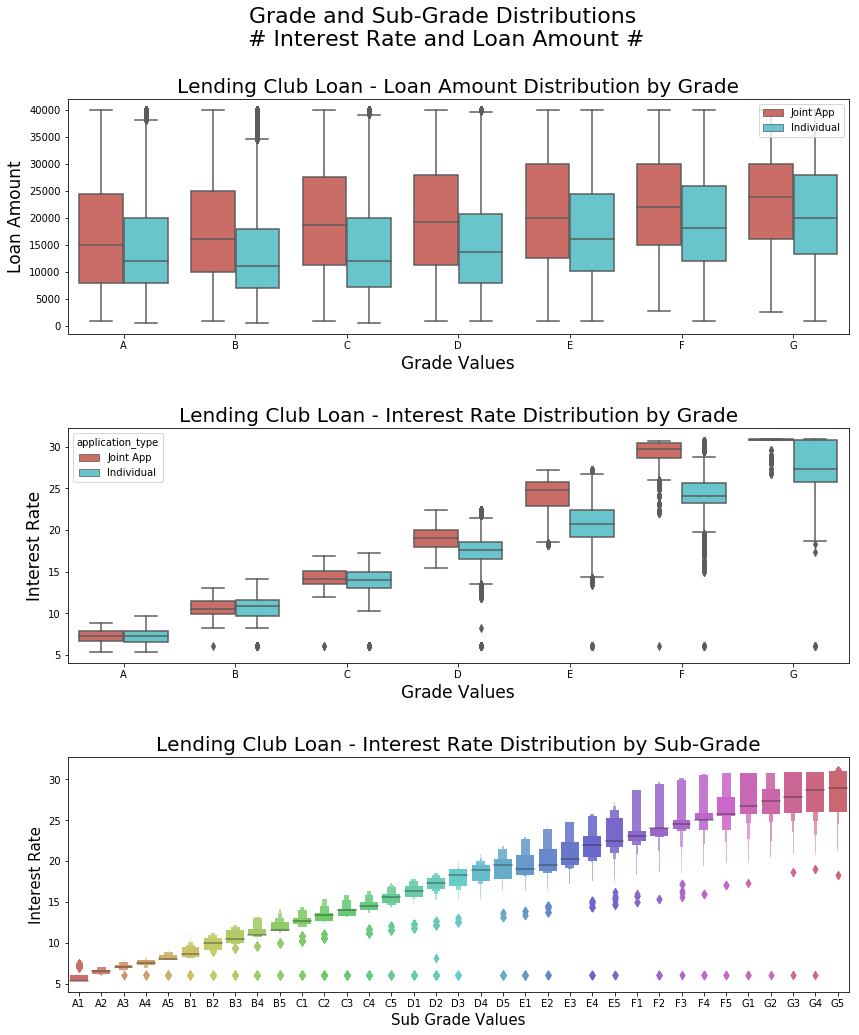

In [27]:
order_sub = df_loan.groupby("sub_grade")['int_rate'].count().index

plt.figure(figsize=(14,16))

plt.suptitle('Grade and Sub-Grade Distributions \n# Interest Rate and Loan Amount #', fontsize=22)

plt.subplot(311)
g = sns.boxplot(x="grade", y="loan_amnt", data=df_loan,
                palette="hls", hue="application_type", 
                order=["A",'B','C','D','E','F', 'G'])
g.set_xlabel("Grade Values", fontsize=17)
g.set_ylabel("Loan Amount", fontsize=17)
g.set_title("Lending Club Loan - Loan Amount Distribution by Grade", fontsize=20)
g.legend(loc='upper right')

plt.subplot(312)
g1 = sns.boxplot(x='grade', y="int_rate",data=df_loan, 
               hue="application_type", palette = "hls",  
               order=["A",'B','C','D','E','F', 'G'])
g1.set_xlabel("Grade Values", fontsize=17)
g1.set_ylabel("Interest Rate", fontsize=17)
g1.set_title("Lending Club Loan - Interest Rate Distribution by Grade", fontsize=20)

plt.subplot(313)
g2 = sns.boxenplot(x="sub_grade", y="int_rate", data=df_loan, 
                   palette="hls", order=order_sub)
g2.set_xlabel("Sub Grade Values", fontsize=15)
g2.set_ylabel("Interest Rate", fontsize=15)
g2.set_title("Lending Club Loan - Interest Rate Distribution by Sub-Grade", fontsize=20)

plt.subplots_adjust(hspace = 0.4,top = 0.9)

plt.show()

Very interesting!!!! <br>
We can clearly see different patterns between Individual and Joint applications.<br>
In sub grade we can see a clearly correlation with interest rate.... Altought we can see many loans of "high" sub-grades with low interest rate <br>

## Mean interest rate by all grades and sub-grades

In [28]:
loan_grade = ['sub_grade', 'grade']
cm = sns.light_palette("green", as_cmap=True)
round(pd.crosstab(df_loan[loan_grade[0]], df_loan[loan_grade[1]], 
            values=df_loan['int_rate'], aggfunc='mean'),2).fillna(0).style.background_gradient(cmap = cm)

grade,A,B,C,D,E,F,G
sub_grade,,,,,,,
A1,5.55,0,0,0,0,0,0
A2,6.52,0,0,0,0,0,0
A3,7.12,0,0,0,0,0,0
A4,7.51,0,0,0,0,0,0
A5,8.21,0,0,0,0,0,0
B1,0,8.91,0,0,0,0,0
B2,0,9.92,0,0,0,0,0
B3,0,10.76,0,0,0,0,0
B4,0,11.51,0,0,0,0,0


Very cool!! Now we can see that the difference of all subgrades of loans

# Employment Features

In [29]:
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import warnings
from collections import Counter

In [3]:
#First plot
trace0 = go.Bar(
    x = df_loan.emp_title.value_counts()[:40].index.values,
    y = df_loan.emp_title.value_counts()[:40].values,
    marker=dict(
        color=df_loan.emp_title.value_counts()[:40].values
    ),
)

data = [trace0]

layout = go.Layout(
    yaxis=dict(
        title='Count'
    ),
    xaxis=dict(
        title='Employment name'
    ),
    title='TOP 40 Employment Title'
)

fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename='emp-title-bar')

NameError: name 'go' is not defined

## Grades by each Employer Title
- I will consider only the 20 most common Employer Titles to see how the grades are distributed by different professionals

In [31]:
title_mask = df_loan.emp_title.value_counts()[:20].index.values 
cm = sns.light_palette("green", as_cmap=True)

round(pd.crosstab(df_loan[df_loan['emp_title'].isin(title_mask)]['emp_title'], 
                  df_loan[df_loan['emp_title'].isin(title_mask)]['sub_grade'], 
                  normalize='index') * 100,2).style.background_gradient(cmap = cm)

sub_grade,A1,A2,A3,A4,A5,B1,B2,B3,B4,B5,C1,C2,C3,C4,C5,D1,D2,D3,D4,D5,E1,E2,E3,E4,E5,F1,F2,F3,F4,F5,G1,G2,G3,G4,G5
emp_title,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Director,6.3,3.99,3.74,5.49,5.47,5.84,5.08,6.67,6.23,5.35,6.42,5.06,5.43,5.06,4.32,2.82,2.45,2.14,2.55,1.75,1.4,0.97,1.38,1.03,0.78,0.45,0.37,0.25,0.45,0.29,0.14,0.1,0.14,0.08,0
Driver,1.85,1.92,2.16,3.07,3.65,5.01,5.17,5.27,6.17,6.67,6.5,6.61,5.7,5.81,5.48,4.4,4.5,3.36,3.07,2.39,1.95,1.52,1.52,1.49,1.38,0.69,0.57,0.59,0.46,0.22,0.28,0.21,0.12,0.1,0.14
Engineer,5.66,3.92,3.92,5.3,5.83,5.73,5.42,6.24,5.76,5.35,6.53,6,4.81,4.35,4.52,3.14,2.44,2.44,2.13,1.77,1.77,1.16,1.02,0.8,0.9,0.94,0.53,0.53,0.27,0.15,0.22,0.12,0.07,0.15,0.12
General Manager,3.65,2.73,2.45,3.27,5.41,6.14,5.88,6.2,5.53,6.06,6.6,6.16,5.09,6,5.31,3.41,3.11,3.05,2.35,1.99,1.64,1.46,1.2,1.16,1.18,0.54,0.72,0.44,0.34,0.2,0.28,0.12,0.2,0.12,0
Manager,3.14,2.73,2.62,3.68,4.74,5.2,5.27,5.66,6,6.06,6.42,5.99,6.05,5.79,5.51,3.53,3.35,2.78,2.79,2.32,1.83,1.66,1.44,1.11,1.07,0.72,0.5,0.46,0.42,0.29,0.22,0.25,0.12,0.14,0.13
Office Manager,2.66,2.54,2.66,3.91,4.6,5.22,5.43,5.35,6.16,6.64,6.51,5.91,6.23,5.48,5.58,4.12,3.29,2.99,2.51,2.25,1.81,1.68,1.38,0.92,1.25,0.8,0.45,0.36,0.43,0.32,0.15,0.15,0.11,0.07,0.07
Operations Manager,2.93,2.63,2.6,3.53,4.97,5.54,5.8,5.45,5.92,6.1,6.79,6.43,5.36,5.72,5.15,3.83,3.08,2.45,3.05,2.6,2.09,1.68,1.53,0.9,1.02,0.69,0.3,0.51,0.48,0.27,0.18,0.15,0.12,0.09,0.06
Owner,4.38,3.49,3.4,4.38,4.89,6.39,5.78,5.87,6.03,5.68,5.99,5.93,4.92,5.24,4.63,3.94,3.31,2.72,2.17,1.94,1.55,1.47,1.23,1.02,0.95,0.51,0.44,0.39,0.37,0.3,0.23,0.13,0.13,0.1,0.11
President,6.21,4.88,4.46,5.99,6.19,6.06,5.43,5.58,5.84,5.48,6.61,4.86,4.86,4.73,4.28,2.75,2.4,2.7,2.1,1.55,1.15,1.03,1.3,1.08,0.53,0.38,0.48,0.28,0.15,0.1,0.15,0.18,0.13,0.03,0.08


Very cool!!! We can see that Director, Engineer, President, Vice President are the category's with highest incidence in Grade A; <br>
Analyzing this table we can get some insights about the profile of grades and professionals.

<h2>Title</h2>

In [32]:
#First plot
trace0 = go.Bar(
    x = df_loan.title.value_counts()[:40].index.values,
    y = df_loan.title.value_counts()[:40].values,
    marker=dict(
        color=df_loan.title.value_counts()[:40].values
    ),
)

data = [trace0]

layout = go.Layout(
    yaxis=dict(
        title='Count'
    ),
    xaxis=dict(
        title='Employment name'
    ),
    title='TOP 40 Employment Title'
)

fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename='emp-title-bar')

<h2>Emp lenght crossed by some columns</h2>

## Emp Length Graphics

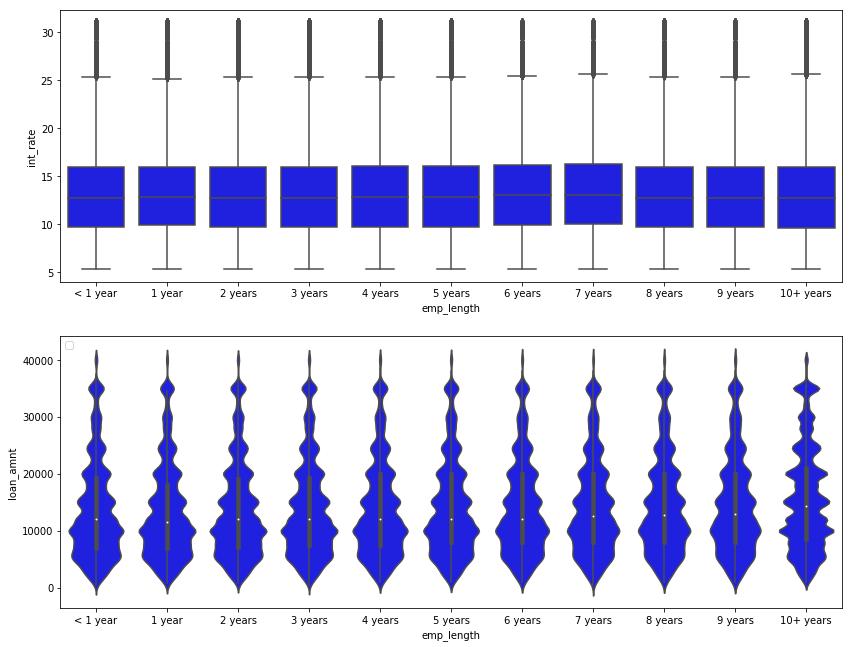

In [33]:
# emp_lenght description: 
# Employment length in years. Possible values are between 0 and 10 where 0 means 
# less than one year and 10 means ten or more years. 

emp_ord = ['< 1 year', '1 year', '2 years', '3 years',
           '4 years', '5 years', '6 years', '7 years',
           '8 years', '9 years', '10+ years']

fig, ax = plt.subplots(2,1, figsize=(14,11))
g = sns.boxplot(x="emp_length", y="int_rate", data=df_loan,
                ax=ax[0], color='blue',
                order=emp_ord)

z = sns.violinplot(x="emp_length", y="loan_amnt",data=df_loan, 
                   ax=ax[1], color='blue',
                   order=emp_ord)
               
plt.legend(loc='upper left')
plt.show()

Interesting! We can see that the years do not influence the interest rate but it have a slightly difference considering the loan_amount patterns

### Let's confirm the mean of int rate of Employment Length

In [34]:
# Emp Length interest rate mean
df_loan.groupby(["emp_length"])['int_rate'].mean().reset_index().T

,0,1,2,3,4,5,6,7,8,9,10
emp_length,1 year,10+ years,2 years,3 years,4 years,5 years,6 years,7 years,8 years,9 years,< 1 year
int_rate,13.2905,13.2082,13.2652,13.2401,13.2763,13.2922,13.3667,13.3762,13.219,13.2589,13.2213


We can note that it's really a very similar mean by all emp length. 

<h2>Terms column</h2>

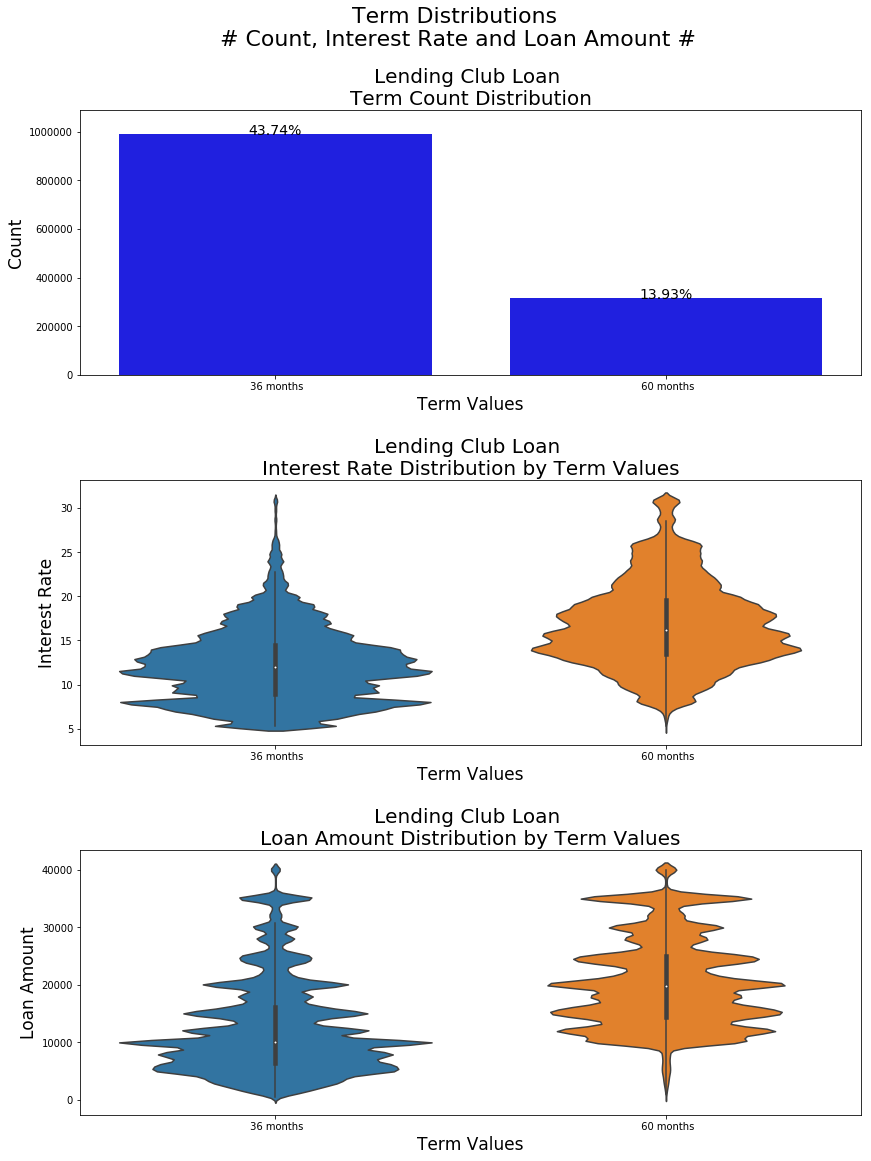

In [35]:
order_sub = df_loan.groupby("sub_grade")['int_rate'].count().index

plt.figure(figsize=(14,18))

plt.suptitle('Term Distributions \n# Count, Interest Rate and Loan Amount #', fontsize=22)

plt.subplot(311)
g = sns.countplot(x="term", data=df_loan,color='blue')
g.set_xlabel("Term Values", fontsize=17)
g.set_ylabel("Count", fontsize=17)
g.set_title("Lending Club Loan \nTerm Count Distribution", fontsize=20)
sizes=[]
for p in g.patches:
    height = p.get_height()
    sizes.append(height)
    g.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total*100),
            ha="center", fontsize=14) 
g.set_ylim(0, max(sizes) * 1.10)

plt.subplot(312)
g1 = sns.violinplot(x='term', y="int_rate",data=df_loan )
g1.set_xlabel("Term Values", fontsize=17)
g1.set_ylabel("Interest Rate", fontsize=17)
g1.set_title("Lending Club Loan \nInterest Rate Distribution by Term Values", fontsize=20)

plt.subplot(313)
g2 = sns.violinplot(x="term", y="loan_amnt", data=df_loan)
g2.set_xlabel("Term Values", fontsize=17)
g2.set_ylabel("Loan Amount", fontsize=17)
g2.set_title("Lending Club Loan \nLoan Amount Distribution by Term Values", fontsize=20)

plt.subplots_adjust(hspace = 0.4, top = 0.9)

plt.show()

<h2>Looking the heatmap cross tab of Adress State x Loan Status<h2>

In [36]:
#Exploring the State Adress x Loan Status
adress_loan = ['addr_state', 'loan_status']
cm = sns.light_palette("green", as_cmap=True)
round(pd.crosstab(df_loan[adress_loan[0]], 
                  df_loan[adress_loan[1]], 
                  normalize='all')*100,2).style.background_gradient(cmap = cm)

loan_status,Charged Off,Default,Fully Paid
addr_state,,,
AK,0.05,0,0.19
AL,0.29,0,0.94
AR,0.18,0,0.56
AZ,0.48,0,1.95
CA,2.89,0,11.77
CO,0.35,0,1.87
CT,0.26,0,1.21
DC,0.03,0,0.22
DE,0.06,0,0.22


Cool, we can see that the below states have the highest shares of loans:
- CA
- FL 
- NY
- Texas

In [37]:
cols = ['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
        'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length',
        'home_ownership', 'desc', 'purpose', 'total_pymnt', 'total_pymnt_inv',]

In [38]:
df_loan['settlement_status'].fillna("None", inplace=True)

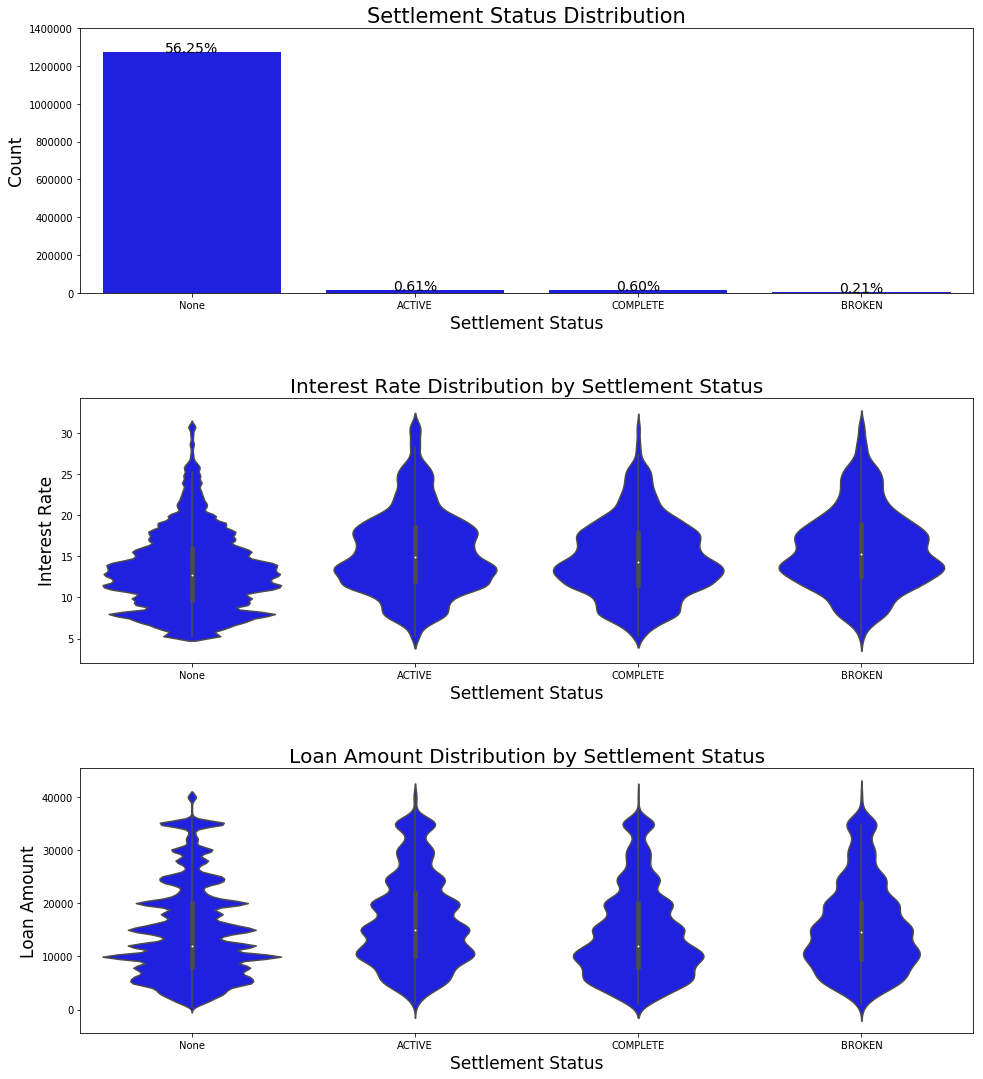

In [39]:
plt.figure(figsize=(16,18))

plt.subplot(311)
g = sns.countplot(x='settlement_status', data=df_loan, color='blue')
g.set_title('Settlement Status Distribution', fontsize=21)
g.set_ylabel("Count", fontsize=17)
g.set_xlabel("Settlement Status", fontsize=17)

sizes=[]
for p in g.patches:
    height = p.get_height()
    sizes.append(height)
    g.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total*100),
            ha="center", fontsize=14) 
g.set_ylim(0, max(sizes) * 1.10)

plt.subplot(312)
g1 = sns.violinplot(x='settlement_status', y="int_rate",
                    data=df_loan, color='blue') 
g1.set_xlabel("Settlement Status", fontsize=17)
g1.set_ylabel("Interest Rate", fontsize=17)
g1.set_title("Interest Rate Distribution by Settlement Status", 
             fontsize=20)

plt.subplot(313)
g2 = sns.violinplot(x="settlement_status", y="loan_amnt", 
                    data=df_loan, color='blue')
g2.set_xlabel("Settlement Status", fontsize=17)
g2.set_ylabel("Loan Amount", fontsize=17)
g2.set_title("Loan Amount Distribution by Settlement Status", 
             fontsize=20)

plt.subplots_adjust(hspace = 0.4, top = 0.9)

plt.show()

In [40]:
df_loan['loan_value'] = (100 * df_loan.revol_bal) / df_loan['revol_util']

# Delinq 2 years 
- The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years


In [41]:
round(pd.crosstab(df_loan['delinq_2yrs'],df_loan['loan_status'],   normalize='columns') * 100,2)[:15]

loan_status,Charged Off,Default,Fully Paid
delinq_2yrs,,,
0.0,79.26,67.74,81.11
1.0,13.38,19.35,12.66
2.0,4.18,3.23,3.64
3.0,1.58,6.45,1.31
4.0,0.71,0.00,0.58
5.0,0.37,3.23,0.30
6.0,0.19,0.00,0.16
7.0,0.12,0.00,0.09
8.0,0.06,0.00,0.05


# DTI
- A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.


In [42]:
cm = sns.light_palette("green", as_cmap=True)

round((pd.crosstab(df_loan['loan_status'], df_loan['purpose'],
            values=df_loan['dti'], aggfunc='mean')).fillna(0),
      2).style.background_gradient(cmap = cm)

purpose,car,credit_card,debt_consolidation,educational,home_improvement,house,major_purchase,medical,moving,other,renewable_energy,small_business,vacation,wedding
loan_status,,,,,,,,,,,,,,
Charged Off,17.49,20.51,20.81,11.05,17.76,16.72,16.38,19.56,18.52,18.6,17.19,15.72,19.12,15.17
Default,38.2,20.19,23.5,0,12.21,0,0,13.73,32.41,13.68,0,0,0,0
Fully Paid,14.45,18.05,18.41,11.27,15.61,14.01,14.41,17.02,15.94,16.5,15.86,14.05,17.27,13.83


# Mean of Credit Utilization Rate by Loan Status and Purpose. 

revol_util: Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.

In [43]:
cm = sns.light_palette("green", as_cmap=True)

round((pd.crosstab(df_loan['loan_status'], df_loan['purpose'],
            values=df_loan['revol_util'], aggfunc='mean')).fillna(0),
      2).style.background_gradient(cmap = cm)

purpose,car,credit_card,debt_consolidation,educational,home_improvement,house,major_purchase,medical,moving,other,renewable_energy,small_business,vacation,wedding
loan_status,,,,,,,,,,,,,,
Charged Off,46.57,59.03,56.07,46.12,46.74,42.66,41.65,49.84,49.88,49.54,52.55,47.33,47.29,51.3
Default,25.1,75.85,57.68,0,22.6,0,0,98.8,65.3,59.5,0,0,0,0
Fully Paid,39.2,55.23,52.42,37.22,41.85,35.86,38.11,45.62,47.2,46.06,46.21,42.73,45.39,46.31


In [44]:
resumetable(df_loan.reset_index())[:45]

Dataset Shape: (1303638, 150)


,Name,dtypes,Missing,Uniques,First Value,Second Value,Third Value,Entropy
0,index,int64,0,1303638,100,152,170,20.31
1,id,float64,1303638,0,NaN,NaN,NaN,0.00
2,member_id,float64,1303638,0,NaN,NaN,NaN,0.00
3,loan_amnt,int64,0,1553,30000,40000,20000,6.96
4,funded_amnt,int64,0,1553,30000,40000,20000,6.96
5,funded_amnt_inv,float64,0,9014,30000,40000,20000,7.41
6,term,object,0,2,36 months,60 months,36 months,0.80
7,int_rate,float64,0,654,22.35,16.14,7.56,7.52
8,installment,float64,0,82574,1151.16,975.71,622.68,14.02
9,grade,object,0,7,D,C,A,2.33


# I'm improving this kernel, so stay Tuned and upvote if you liked =)

In [45]:
df_loan.select_dtypes(include=[int, float]).head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,url,dti,...,hardship_length,hardship_dpd,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,settlement_amount,settlement_percentage,settlement_term,int_round,loan_value
100,NaN,NaN,30000,30000,30000.0,22.35,1151.16,100000.0,NaN,30.46,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22,42170.270270
152,NaN,NaN,40000,40000,40000.0,16.14,975.71,45000.0,NaN,50.53,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16,54218.604651
170,NaN,NaN,20000,20000,20000.0,7.56,622.68,100000.0,NaN,18.92,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8,85003.344482
186,NaN,NaN,4500,4500,4500.0,11.31,147.99,38500.0,NaN,4.64,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11,29228.758170
215,NaN,NaN,8425,8425,8425.0,27.27,345.18,450000.0,NaN,12.37,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27,56030.441400


In [46]:
numericals_clusters = ['loan_amnt', 'annual_inc', 'dti', 'total_acc', 'loan_status',
                       'revol_bal', 'revol_util', 'installment', 'int_rate']

In [47]:
resumetable(df_loan[numericals_clusters].reset_index())

Dataset Shape: (1303638, 10)


,Name,dtypes,Missing,Uniques,First Value,Second Value,Third Value,Entropy
0,index,int64,0,1303638,100,152,170,20.31
1,loan_amnt,int64,0,1553,30000,40000,20000,6.96
2,annual_inc,float64,0,62989,100000,45000,100000,8.30
3,dti,float64,312,6870,30.46,50.53,18.92,11.74
4,total_acc,float64,0,142,19,37,19,5.52
5,loan_status,object,0,3,Fully Paid,Fully Paid,Fully Paid,0.72
6,revol_bal,int64,0,82819,15603,34971,25416,15.21
7,revol_util,float64,810,1363,37,64.5,29.9,9.88
8,installment,float64,0,82574,1151.16,975.71,622.68,14.02
9,int_rate,float64,0,654,22.35,16.14,7.56,7.52


In [48]:
df_loan[df_loan['dti'].isna()][numericals_clusters].nunique()

loan_amnt      109
annual_inc       3
dti              0
total_acc       46
loan_status      2
revol_bal      306
revol_util     264
installment    298
int_rate       102
dtype: int64

In [49]:
df_loan[df_loan['dti'] == -1][numericals_clusters]

,loan_amnt,annual_inc,dti,total_acc,loan_status,revol_bal,revol_util,installment,int_rate
723428,15000,94000.0,-1.0,24.0,Fully Paid,15445,45.8,482.25,9.75
1377778,17000,75000.0,-1.0,34.0,Fully Paid,44587,78.2,391.08,13.49


In [50]:
df_loan['dti'].value_counts()[df_loan['dti'].value_counts() == 312]

26.42    312
27.28    312
26.15    312
7.22     312
Name: dti, dtype: int64